<a href="https://colab.research.google.com/github/MMakovec/PoemWebsite/blob/gh-pages/Copy_of_Reach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Reach dataset contains weather and different characteristics, energy consumption of 28 houses. 
- The dataset is used for short term load forecasting for 1 and up to 3 hours into the future.

- Importing the needed libraries, mounting drive and copying data to the disk.

In [ ]:
import shutil
import pathlib
import os
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount("/content/drive")

all_files = os.listdir("/content/drive/MyDrive/IJS/Reach/")

for file_name in all_files:
    full_file_name = os.path.join('/content/drive/MyDrive/IJS/Reach/', file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, "/content")

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
import xgboost as xgb

- Importing data.

In [ ]:
Holidays = pd.read_csv('Holidays.csv')
Residential_1 = pd.read_csv('Residential_1.csv')
Residential_2 = pd.read_csv('Residential_2.csv')
Residential_3 = pd.read_csv('Residential_3.csv')
Residential_4 = pd.read_csv('Residential_4.csv')
Residential_5 = pd.read_csv('Residential_5.csv')
Residential_6 = pd.read_csv('Residential_6.csv')
Residential_7 = pd.read_csv('Residential_7.csv')
Residential_8 = pd.read_csv('Residential_8.csv')
Residential_9 = pd.read_csv('Residential_9.csv')
Residential_10 = pd.read_csv('Residential_10.csv')
Residential_11 = pd.read_csv('Residential_11.csv')
Residential_12 = pd.read_csv('Residential_12.csv')
Residential_13 = pd.read_csv('Residential_13.csv')
Residential_14 = pd.read_csv('Residential_14.csv')
Residential_15 = pd.read_csv('Residential_15.csv')
Residential_16 = pd.read_csv('Residential_16.csv')
Residential_17 = pd.read_csv('Residential_17.csv')
Residential_18 = pd.read_csv('Residential_18.csv')
Residential_19 = pd.read_csv('Residential_19.csv')
Residential_20 = pd.read_csv('Residential_20.csv')
Residential_21 = pd.read_csv('Residential_21.csv')
Residential_22 = pd.read_csv('Residential_22.csv')
Residential_23 = pd.read_csv('Residential_23.csv')
Residential_24 = pd.read_csv('Residential_24.csv')
Residential_25 = pd.read_csv('Residential_25.csv')
Residential_26 = pd.read_csv('Residential_26.csv')
Residential_27 = pd.read_csv('Residential_27.csv')
Residential_28 = pd.read_csv('Residential_28.csv')
Solar = pd.read_csv('Solar.csv')
Weather_WYJ = pd.read_csv('Weather_WYJ.csv')
Weather_YVR = pd.read_csv('Weather_YVR.csv')

Houses = [Residential_1,Residential_2,Residential_3,Residential_4,Residential_5,Residential_6,Residential_7,Residential_8,Residential_9,\
          Residential_10,Residential_11,Residential_12,Residential_13,Residential_14,Residential_15,Residential_16,Residential_17,Residential_18,\
          Residential_19,Residential_20,Residential_21,Residential_22,Residential_23,Residential_24,Residential_25,Residential_26,Residential_27,\
          Residential_28]
files = [Residential_1,Residential_2,Residential_3,Residential_4,Residential_5,Residential_6,Residential_7,Residential_8,Residential_9,\
          Residential_10,Residential_11,Residential_12,Residential_13,Residential_14,Residential_15,Residential_16,Residential_17,Residential_18,\
          Residential_19,Residential_20,Residential_21,Residential_22,Residential_23,Residential_24,Residential_25,Residential_26,Residential_27,\
          Residential_28,Weather_WYJ,Weather_YVR]

In [ ]:
Residential_1.head()

,date,hour,energy_kWh
0,2012-06-01,1,1.011
1,2012-06-01,2,0.451
2,2012-06-01,3,0.505
3,2012-06-01,4,0.441
4,2012-06-01,5,0.468


- Changing the Weather hour timestamp from 1-24 to 0-23 to match all the other data.

In [ ]:
Weather_WYJ['hour'] = Weather_WYJ['hour']-1
Weather_YVR['hour'] = Weather_YVR['hour']-1

- Converting all the dates into pandas DateTime format.

In [ ]:
for h in files:
  h['hour'] = h['hour'].astype(str)
  h['ts'] = h.apply(lambda row: f"{row['date']}T{int(row['hour']):02d}:00:00", axis=1)

  h.drop(['date', 'hour'], inplace=True, axis=1)

  h['ts'] = pd.to_datetime(h['ts'])

h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73302 entries, 0 to 73301
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   temperature  73295 non-null  float64       
 1   humidity     73276 non-null  float64       
 2   pressure     73282 non-null  float64       
 3   weather      39770 non-null  object        
 4   ts           73302 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.8+ MB


- Setting the dates as the index.

In [ ]:
for h in files:
  h.set_index(['ts'], inplace=True)

In [ ]:
Residential_1.head()

,energy_kWh
ts,
2012-06-01 01:00:00,1.011
2012-06-01 02:00:00,0.451
2012-06-01 03:00:00,0.505
2012-06-01 04:00:00,0.441
2012-06-01 05:00:00,0.468


In [ ]:
Weather_WYJ.head()

,temperature,humidity,pressure,weather
ts,,,,
2015-01-01 00:00:00,0.7,88,102.31,NaN
2015-01-01 01:00:00,1.0,88,102.26,NaN
2015-01-01 02:00:00,0.7,90,102.22,NaN
2015-01-01 03:00:00,0.6,90,102.18,NaN
2015-01-01 04:00:00,-0.4,91,102.11,NaN


- Dropping the weather feature, because it has a lot of missing values.

In [ ]:
Weather_WYJ['weather'].isna().sum()

43730

In [ ]:
Weather_WYJ = Weather_WYJ.drop(['weather'], axis='columns')
Weather_YVR = Weather_YVR.drop(['weather'], axis='columns')

- Merging house 15 with the weather information, from the weather station in the same region.
- Selecting only the period in which both energy consumption and weather information is available.
- Interpolating the missing weather values.
- Creating the "energy_kWh_now", "energy_kWh_houseMean", "energy_kWh", "energy_kWh_2", "energy_kWh_3":
  - energy_kWh_now: energy consumpiton in kWh for the current hour.
  - energy_kWh_houseMean: energy consumption mean in kWh for each house.
  - energy_kWh: energy consumption for one hour into the future in kWh.
  - energy_kWh_2: energy consumption for two hours into the future in kWh.
  - energy_kWh_3: energy consumption for three hours into the future in kWh.


In [ ]:
rs_15 = pd.merge(Residential_15, Weather_WYJ,how='outer',right_index=True,left_index=True)
rs_15 = rs_15.loc['2015-09-29 00:00:00':'2018-02-20 23:00:00']  # period where we measured electrical consumption
rs_15[['temperature','pressure','humidity']] = rs_15[['temperature', 'pressure', 'humidity']].interpolate()
rs_15['energy_kWh_now'] = rs_15['energy_kWh']
rs_15['energy_kWh_houseMean'] = np.mean(rs_15['energy_kWh'])
rs_15['energy_kWh'] = rs_15.energy_kWh.shift(-1)
rs_15['energy_kWh_2'] = rs_15.energy_kWh.shift(-2)
rs_15['energy_kWh_3'] = rs_15.energy_kWh.shift(-3)

In [ ]:
rs_15.head()

,energy_kWh,temperature,humidity,pressure,energy_kWh_now,energy_kWh_houseMean,energy_kWh_2,energy_kWh_3
ts,,,,,,,,
2015-09-29 00:00:00,0.30,8.3,94.0,100.73,0.81,1.630495,1.77,2.66
2015-09-29 01:00:00,0.98,7.7,94.0,100.72,0.30,1.630495,2.66,2.70
2015-09-29 02:00:00,1.77,8.1,96.0,100.70,0.98,1.630495,2.70,2.92
2015-09-29 03:00:00,2.66,10.2,91.0,100.69,1.77,1.630495,2.92,3.00
2015-09-29 04:00:00,2.70,12.4,82.0,100.67,2.66,1.630495,3.00,0.51


- Repeating the process for each house.

In [ ]:
Houses = [Residential_1,Residential_2,Residential_3,Residential_4,Residential_5,Residential_6,Residential_7,Residential_8,Residential_9,\
          Residential_10,Residential_11,Residential_12,Residential_13,Residential_14,Residential_16,Residential_17,Residential_18,\
          Residential_19,Residential_20,Residential_21,Residential_22,Residential_23,Residential_24,Residential_25,Residential_26,Residential_27,\
          Residential_28]
i = 0
for h in Houses:
  Houses[i] = pd.merge(h, Weather_YVR,how='outer',right_index=True,left_index=True)
  i+=1

In [ ]:
def adjust_period(house, start, end):
  return house.loc[start:end]

# date and time of first and last measurment for each house
periods = [['2012-06-01 01:00:00','2015-10-03 00:00:00'],   #rs_1
           ['2016-06-09 00:00:00','2019-11-20 23:00:00'],   #rs_2
           ['2015-01-27 00:00:00','2018-01-29 23:00:00'],   #rs_3
           ['2015-01-30 00:00:00','2018-01-29 23:00:00'],   #rs_4
           ['2015-01-30 00:00:00','2018-01-29 23:00:00'],   #rs_5
           ['2015-01-30 00:00:00','2018-01-29 23:00:00'],   #rs_6
           ['2015-05-30 00:00:00','2018-01-29 23:00:00'],   #rs_7
           ['2015-02-21 00:00:00','2018-02-20 23:00:00'],   #rs_8
           ['2015-05-01 00:00:00','2018-02-21 23:00:00'],   #rs_9
           ['2015-02-21 00:00:00','2018-02-20 23:00:00'],   #rs_10
           ['2015-02-21 00:00:00','2018-02-20 23:00:00'],   #rs_11
           ['2015-02-21 00:00:00','2018-02-20 23:00:00'],   #rs_12
           ['2015-02-21 00:00:00','2018-02-20 23:00:00'],   #rs_13
           ['2015-02-21 00:00:00','2018-02-20 23:00:00'],   #rs_14
           ['2017-11-01 00:00:00','2019-02-18 23:00:00'],   #rs_16
           ['2016-06-01 00:00:00','2017-04-29 23:00:00'],   #rs_17
           ['2015-03-16 00:00:00','2018-03-15 23:00:00'],   #rs_18
           ['2015-03-26 00:00:00','2018-03-25 23:00:00'],   #rs_19
           ['2015-08-21 00:00:00','2018-04-20 23:00:00'],   #rs_20
           ['2017-11-01 00:00:00','2018-06-05 23:00:00'],   #rs_21
           ['2016-06-29 00:00:00','2018-06-05 23:00:00'],   #rs_22
           ['2017-07-27 00:00:00','2020-04-05 23:00:00'],   #rs_23
           ['2017-05-13 00:00:00','2020-05-12 23:00:00'],   #rs_24
           ['2017-05-15 00:00:00','2020-05-14 23:00:00'],   #rs_25
           ['2019-11-29 00:00:00','2020-05-20 23:00:00'],   #rs_26
           ['2019-03-06 00:00:00','2020-05-20 23:00:00'],   #rs_27
           ['2018-08-01 00:00:00','2020-05-19 23:00:00']]   #rs_28

i = 0
for h in Houses:
  Houses[i] = adjust_period(Houses[i], periods[i][0], periods[i][1])
  i+=1

In [ ]:
for h in Houses:
  h['energy_kWh_now'] = h['energy_kWh']
  h['energy_kWh_houseMean'] = np.mean(h['energy_kWh'])
for h in Houses:
  h[['temperature','pressure','humidity']] = h[['temperature','pressure','humidity']].interpolate()
  h['energy_kWh'] = h.energy_kWh.shift(-1)
  h['energy_kWh_2'] = h.energy_kWh.shift(-2)
  h['energy_kWh_3'] = h.energy_kWh.shift(-3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# creating a dictionary with all houses
i = 1
house_dict = {}
for h in Houses:
  if i==15:
    i+=1
  house_dict['rs_'+str(i)] = h
  i+=1
house_dict['rs_15'] = rs_15

- Writing in the type of each house, the way it's facing, whether it has AC, whether there is an electrical vehicle (if there is, the capacity of the battery in kWh is written) and the number of residential units each house has.

In [ ]:
# creating features from metadata 

def meta_create(res, type_of_house, facing, AC, EV, RUs):
  res['type'] = type_of_house
  res['facing'] = facing
  res['AC'] = AC
  res['EV'] = EV
  res['RUs'] = RUs
  return res

#                                        type         facing     AC    EV    RUs

rs_1 = meta_create( house_dict['rs_1'],  'bungalow',  'South',   1,    0,    1)
rs_2 = meta_create( house_dict['rs_2'],  'duplex',    'North',   0,    0,    0)
rs_3 = meta_create( house_dict['rs_3'],  'modern',    'South',   0,    0,    2)
rs_4 = meta_create( house_dict['rs_4'],  'character', 'West',    0,    0,    1)
rs_5 = meta_create( house_dict['rs_5'],  'modern',    'South',   0,    0,    1)
rs_6 = meta_create( house_dict['rs_6'],  'apartment', 'SW',      0,    0,    0)
rs_7 = meta_create( house_dict['rs_7'],  '?',         '?',      '?',  '?',  '?')
rs_8 = meta_create( house_dict['rs_8'],  'character', 'South',   1,    0,    0)
rs_9 = meta_create( house_dict['rs_9'],  'special',   'South',   0,    0,    0)
rs_10 = meta_create(house_dict['rs_10'], 'special',   'South',   0,    0,    0)
rs_11 = meta_create(house_dict['rs_11'], 'duplex',    'North',   0,    0,    0)
rs_12 = meta_create(house_dict['rs_12'], 'apartment', 'NW',      0,    0,    0)
rs_13 = meta_create(house_dict['rs_13'], 'special',   'North',   0,    0,    1)
rs_14 = meta_create(house_dict['rs_14'], 'modern',    'South',   0,    0,    1)
rs_15 = meta_create(house_dict['rs_15'], 'bungalow',  'ENE',     0,    0,    1)
rs_16 = meta_create(house_dict['rs_16'], 'apartment', 'NE',      0,    0,    0)
rs_17 = meta_create(house_dict['rs_17'], 'apartment', 'SW',      0,    0,    0)
rs_18 = meta_create(house_dict['rs_18'], 'bungalow',  'East',    1,    85,   0)
rs_19 = meta_create(house_dict['rs_19'], 'special',   'West',    0,    0,    0)
rs_20 = meta_create(house_dict['rs_20'], 'character', 'North',   0,    0,    0)
rs_21 = meta_create(house_dict['rs_21'], 'laneway',   'West',    0,    0,    0)
rs_22 = meta_create(house_dict['rs_22'], 'apartment', 'South',   0,    0,    0)
rs_23 = meta_create(house_dict['rs_23'], 'apartment', 'SE',      0,    0,    0)
rs_24 = meta_create(house_dict['rs_24'], 'modern',    'South',   1,    0,    0)
rs_25 = meta_create(house_dict['rs_25'], 'character', 'South',   0,    0,    0)
rs_26 = meta_create(house_dict['rs_26'], 'apartment', 'NNW',     0,    0,    0)
rs_27 = meta_create(house_dict['rs_27'], 'apartment', 'NW',      0,    0,    0)
rs_28 = meta_create(house_dict['rs_28'], 'special',   'North',   0,    0,    0)

In [ ]:
rs_15.head()

,energy_kWh,temperature,humidity,pressure,energy_kWh_now,energy_kWh_houseMean,energy_kWh_2,energy_kWh_3,type,facing,AC,EV,RUs
ts,,,,,,,,,,,,,
2015-09-29 00:00:00,0.30,8.3,94.0,100.73,0.81,1.630495,1.77,2.66,bungalow,ENE,0,0,1
2015-09-29 01:00:00,0.98,7.7,94.0,100.72,0.30,1.630495,2.66,2.70,bungalow,ENE,0,0,1
2015-09-29 02:00:00,1.77,8.1,96.0,100.70,0.98,1.630495,2.70,2.92,bungalow,ENE,0,0,1
2015-09-29 03:00:00,2.66,10.2,91.0,100.69,1.77,1.630495,2.92,3.00,bungalow,ENE,0,0,1
2015-09-29 04:00:00,2.70,12.4,82.0,100.67,2.66,1.630495,3.00,0.51,bungalow,ENE,0,0,1


- Creating "energy_kWh_daymean", "energy_kWh_daymax", "energy_kWh_daymin", "temperature_daymean", "temperature_daymax", "temperature_daymin", "energy_diff","energy_day_diff":
  - energy_kWh_daymean: The consumption mean of the previous day in kWh.
  - energy_kWh_daymax: The consumption max of the previous day in kWh.
  - energy_kwh_daymin: The consumption min of the previous day in kWh.
  - temperature_daymean: The temperature mean of the previous day.
  - temperature_daymax: The temperature max of the previous day.
  - temperature_daymin: The temperature min of the previous day.
  - energy_diff: the difference between consumption of the current and previous hour.
  - energy_day_diff: the difference in consumption at the same time on the current and previous day.


In [ ]:
'''MinMaxFeatures = ['energy_kWh_day','temperature_day']
features = ['energy_kWh_now','temperature']
functions = [np.mean,np.max,np.min]
functionNames = ['mean','max','min']
for MMname,name in zip(MinMaxFeatures,features):
  for fun,fname in zip(functions,functionNames):
    rs_1[MMname+'mean'] = rs_1[name].dropna().resample('1d').mean()
    rs_1[MMname+'max'] = rs_1[name].dropna().resample('1d').max()
    rs_1[MMname+'min'] = rs_1[name].dropna().resample('1d').min()'''

"MinMaxFeatures = ['energy_kWh_day','temperature_day']\nfeatures = ['energy_kWh_now','temperature']\nfunctions = [np.mean,np.max,np.min]\nfunctionNames = ['mean','max','min']\nfor MMname,name in zip(MinMaxFeatures,features):\n  for fun,fname in zip(functions,functionNames):\n    rs_1[MMname+'mean'] = rs_1[name].dropna().resample('1d').mean()\n    rs_1[MMname+'max'] = rs_1[name].dropna().resample('1d').max()\n    rs_1[MMname+'min'] = rs_1[name].dropna().resample('1d').min()"

In [ ]:
# For residential 1

rs_1['energy_kWh_daymean'] = rs_1['energy_kWh_now'].dropna().resample('1d').mean()
x = rs_1['energy_kWh_now'].dropna().resample('1d').mean()
x = x.resample('1H').mean()
x = x.to_frame()
x.ffill(axis=0,inplace=True)
rs_1['energy_kWh_daymean'] = x
rs_1['energy_kWh_daymean'] = rs_1.energy_kWh_daymean.shift(23)

rs_1['energy_kWh_daymax'] = rs_1['energy_kWh_now'].dropna().resample('1d').max()
x = rs_1['energy_kWh_now'].dropna().resample('1d').max()
x = x.resample('1H').max()
x = x.to_frame()
x.ffill(axis=0,inplace=True)
rs_1['energy_kWh_daymax'] = x
rs_1['energy_kWh_daymin'] = rs_1.energy_kWh_daymax.shift(23)

rs_1['energy_kWh_daymin'] = rs_1['energy_kWh_now'].dropna().resample('1d').min()
x = rs_1['energy_kWh_now'].dropna().resample('1d').min()
x = x.resample('1H').min()
x = x.to_frame()
x.ffill(axis=0,inplace=True)
rs_1['energy_kWh_daymin'] = x
rs_1['energy_kWh_daymin'] = rs_1.energy_kWh_daymin.shift(23)

rs_1['temperature_daymean'] = rs_1['temperature'].dropna().resample('1d').mean()
x = rs_1['temperature'].dropna().resample('1d').mean()
x = x.resample('1H').mean()
x = x.to_frame()
x.ffill(axis=0,inplace=True)
rs_1['temperature_daymean'] = x
rs_1['temperature_daymean'] = rs_1.temperature_daymean.shift(23)

rs_1['temperature_daymax'] = rs_1['temperature'].dropna().resample('1d').max()
x = rs_1['temperature'].dropna().resample('1d').max()
x = x.resample('1H').max()
x = x.to_frame()
x.ffill(axis=0,inplace=True)
rs_1['temperature_daymax'] = x
rs_1['temperature_daymin'] = rs_1.temperature_daymax.shift(23)

rs_1['temperature_daymin'] = rs_1['temperature'].dropna().resample('1d').min()
x = rs_1['temperature'].dropna().resample('1d').min()
x = x.resample('1H').min()
x = x.to_frame()
x.ffill(axis=0,inplace=True)
rs_1['temperature_daymin'] = x
rs_1['temperature_daymin'] = rs_1.temperature_daymin.shift(23)

rs_1['energy_diff'] = rs_1['energy_kWh_now'] - rs_1['energy_kWh_now'].shift(1)
rs_1['energy_day_diff'] = rs_1['energy_kWh_now'] - rs_1['energy_kWh_now'].shift(24)

In [ ]:
house_array = [rs_2,rs_3,rs_4,rs_5,rs_6,rs_7,rs_8,rs_9,rs_10,rs_11,rs_12,rs_13,rs_14,rs_15,rs_16,rs_17,rs_18,rs_19,rs_20,\
        rs_21,rs_22,rs_23,rs_24,rs_25,rs_26,rs_27,rs_28]

In [ ]:
for h in house_array:
  h['energy_kWh_daymean'] = h['energy_kWh_now'].dropna().resample('1d').mean()
  h['energy_kWh_daymean'].ffill(axis=0,inplace=True)
  h['energy_kWh_daymean'] = h.energy_kWh_daymean.shift(24)

  h['energy_kWh_daymax'] = h['energy_kWh_now'].dropna().resample('1d').max()
  h['energy_kWh_daymax'].ffill(axis=0,inplace=True)
  h['energy_kWh_daymax'] = h.energy_kWh_daymax.shift(24)

  h['energy_kWh_daymin'] = h['energy_kWh_now'].dropna().resample('1d').min()
  h['energy_kWh_daymin'].ffill(axis=0,inplace=True)
  h['energy_kWh_daymin'] = h.energy_kWh_daymin.shift(24)

  h['temperature_daymean'] = h['temperature'].dropna().resample('1d').mean()
  h['temperature_daymean'].ffill(axis=0,inplace=True)
  h['temperature_daymean'] = h.temperature_daymean.shift(24)

  h['temperature_daymax'] = h['temperature'].dropna().resample('1d').max()
  h['temperature_daymax'].ffill(axis=0,inplace=True)
  h['temperature_daymax'] = h.temperature_daymax.shift(24)

  h['temperature_daymin'] = h['temperature'].dropna().resample('1d').min()
  h['temperature_daymin'].ffill(axis=0,inplace=True)
  h['temperature_daymin'] = h.temperature_daymin.shift(24)

  h['energy_diff'] = h['energy_kWh_now'] - h['energy_kWh_now'].shift(1)
  h['energy_day_diff'] = h['energy_kWh_now'] - h['energy_kWh_now'].shift(24)

In [ ]:
rs_15[30:35]

,energy_kWh,temperature,humidity,pressure,energy_kWh_now,energy_kWh_houseMean,energy_kWh_2,energy_kWh_3,type,facing,...,EV,RUs,energy_kWh_daymean,energy_kWh_daymax,energy_kWh_daymin,temperature_daymean,temperature_daymax,temperature_daymin,energy_diff,energy_day_diff
ts,,,,,,,,,,,,,,,,,,,,,
2015-09-30 06:00:00,3.41,7.500000,98.000000,100.830000,3.47,1.630495,0.83,0.41,bungalow,ENE,...,0,1,1.1375,3.0,0.28,13.216667,19.6,7.7,0.15,0.55
2015-09-30 07:00:00,1.95,9.366667,92.666667,100.856667,3.41,1.630495,0.41,0.62,bungalow,ENE,...,0,1,1.1375,3.0,0.28,13.216667,19.6,7.7,-0.06,0.41
2015-09-30 08:00:00,0.83,11.233333,87.333333,100.883333,1.95,1.630495,0.62,0.63,bungalow,ENE,...,0,1,1.1375,3.0,0.28,13.216667,19.6,7.7,-1.46,1.44
2015-09-30 09:00:00,0.41,13.100000,82.000000,100.910000,0.83,1.630495,0.63,0.67,bungalow,ENE,...,0,1,1.1375,3.0,0.28,13.216667,19.6,7.7,-1.12,0.53
2015-09-30 10:00:00,0.62,14.800000,76.000000,100.920000,0.41,1.630495,0.67,0.77,bungalow,ENE,...,0,1,1.1375,3.0,0.28,13.216667,19.6,7.7,-0.42,0.13


- Joining together all houses into data.

In [ ]:
data = pd.concat([rs_1,rs_2,rs_3,rs_4,rs_5,rs_6,rs_7,rs_8,rs_9,rs_10,rs_11,rs_12,rs_13,rs_14,rs_15,rs_16,rs_17,rs_18,rs_19,rs_20,rs_21,rs_22,rs_23,\
                  rs_24,rs_25,rs_26,rs_27,rs_28])

In [ ]:
Datasave = data
residential = {}
houses = [rs_1,rs_2,rs_3,rs_4,rs_5,rs_6,rs_7,rs_8,rs_9,rs_10,rs_11,rs_12,rs_13,rs_14,rs_15,rs_16,rs_17,rs_18,rs_19,rs_20,\
                rs_21,rs_22,rs_23,rs_24,rs_25,rs_26,rs_27,rs_28]
for i in range(1,len(house_dict)+1,1):
  residential[str(i)] = houses[i-1]

In [ ]:
data = Datasave

- Replacing strings in facing with numeric values:
  - East and West houses get hotter faster, they are replaced with 1.
  - North and South are the opposites and replaced with 0.
  - NE, SE, NW, SW are something inbetween and replaced with 0.5.
  - NNW is more north, replaced with 0.25.
  - ENE is more east, replaced with 0.75.
  - One house has missing values so I replaced them with the mean.



In [ ]:
data.replace({'facing':['East','West']},1,inplace=True)
data.replace({'facing':['South','North']},0,inplace=True)
data.replace({'facing':['NE','SE','NW','SW']},0.5,inplace=True)
data.replace({'facing':['NNW']},0.25,inplace=True)
data.replace({'facing':['ENE']},0.75,inplace=True)
data.replace({'facing':['?']},np.NaN,inplace=True)
data.replace({'facing': np.NaN},data['facing'].mean(),inplace=True)
data.replace({'AC':'?'},np.NaN,inplace=True)
data.replace({'AC':np.NaN},data['AC'].mean(),inplace=True)
data.replace({'EV':'?'},0,inplace=True)
data.replace({'RUs':'?'},np.NaN,inplace=True)
data.replace({'RUs':np.NaN},data['RUs'].mean(),inplace=True)

- Plot showing correlation between energy consumption and the day of the week.

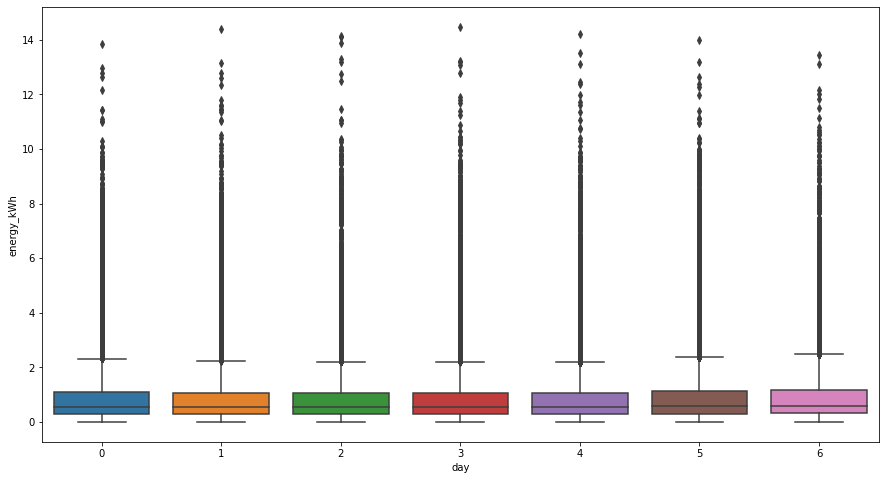

In [ ]:
data = data.reset_index()

data['day'] = pd.DatetimeIndex(data['ts']).dayofweek
plt.figure(figsize=(15,8))
sns.boxplot(x='day',y='energy_kWh',data=data)
data.drop(['day'], axis=1, inplace=True)


data.set_index(['ts'], inplace=True)

- Plot showing correlation between consumption and time of the year in months.

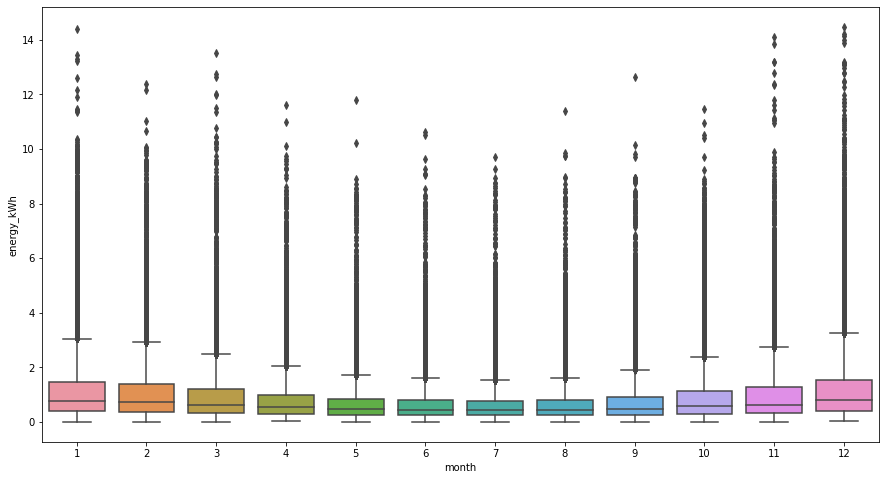

In [ ]:
data = data.reset_index()

data['month'] = pd.DatetimeIndex(data['ts']).month
plt.figure(figsize=(15,8))
sns.boxplot(x='month',y='energy_kWh',data=data)
data.drop(['month'], axis=1, inplace=True)

data.set_index(['ts'], inplace=True)

- Plot showing correlation between energy consumption and the type of the house.

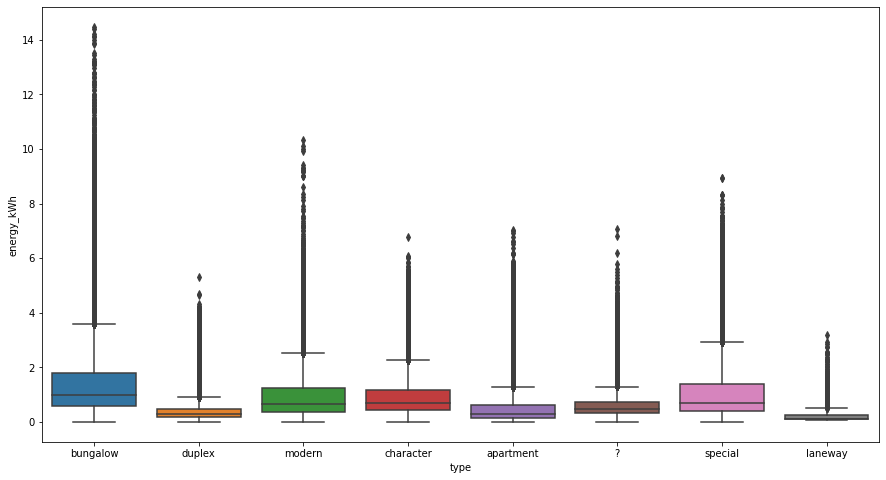

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='type',y='energy_kWh',data=data)

- Plot showing correlation between energy consumption and time of the day in hours.

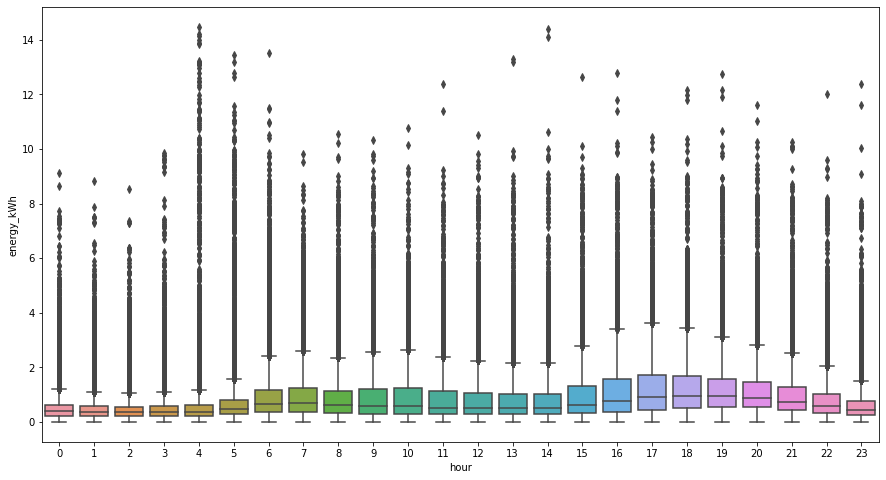

In [ ]:
data = data.reset_index()

data['hour'] = pd.DatetimeIndex(data['ts']).hour
plt.figure(figsize=(15,8))
sns.boxplot(x='hour',y='energy_kWh',data=data)
data.drop(['hour'], axis=1, inplace=True)

data.set_index(['ts'], inplace=True)

- Making "part_of_day", "part_of_year" and "weekend" feature for each house individually:

  - part_of_day: each day divided into periods (0 ... least active, 5 ... most active).
  - part_of_year: each year divided into periods (1 ... least active, 4 ... most acitve).
  - weekend: workday is represented by a 0 and weekends are represented by a 1.

In [ ]:
for i in range(1,len(residential)+1,1):  
  residential[str(i)].reset_index(inplace=True)
  residential[str(i)]['hour'] = pd.DatetimeIndex(residential[str(i)]['ts']).hour
  residential[str(i)]['month'] = pd.DatetimeIndex(residential[str(i)]['ts']).month
  residential[str(i)].drop(['AC'],axis=1, inplace=True)
for i in range(1,len(residential)+1,1):
  residential[str(i)]['hour'].replace([0,1,2,3,4],0, inplace=True)
  residential[str(i)]['hour'].replace([5,23],1,inplace=True)
  residential[str(i)]['hour'].replace([9,10,11,12,13,14],2,inplace=True)
  residential[str(i)]['hour'].replace([6,7,8,15,22],3,inplace=True)
  residential[str(i)]['hour'].replace([16,21],4,inplace=True)
  residential[str(i)]['hour'].replace([17,18,19,20],5,inplace=True)
  residential[str(i)]['month'].replace([5,6,7,8],5,inplace=True)
  residential[str(i)]['month'].replace([4,9],4,inplace=True)
  residential[str(i)]['month'].replace([3,10],3,inplace=True)
  residential[str(i)]['month'].replace([2,11],2,inplace=True)
  residential[str(i)]['month'].replace([1,12],1,inplace=True)
  residential[str(i)].rename(columns={'hour':'part_of_day'},inplace=True)
  residential[str(i)].rename(columns={'month':'part_of_year'},inplace=True)
  residential[str(i)]['weekend'] = pd.DatetimeIndex(residential[str(i)]['ts']).dayofweek
  residential[str(i)]['weekend'].replace([0,1,2,3,4],0,inplace=True)
  residential[str(i)]['weekend'].replace([5,6],1,inplace=True)
  residential[str(i)].drop(['ts'],axis=1,inplace=True)

#residential[str(i)].reset_index(inplace=True)

In [ ]:
residential['15'].head()

,energy_kWh,temperature,humidity,pressure,energy_kWh_now,energy_kWh_houseMean,energy_kWh_2,energy_kWh_3,type,facing,...,energy_kWh_daymax,energy_kWh_daymin,temperature_daymean,temperature_daymax,temperature_daymin,energy_diff,energy_day_diff,part_of_day,part_of_year,weekend
0,0.30,8.3,94.0,100.73,0.81,1.630495,1.77,2.66,bungalow,ENE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4,0
1,0.98,7.7,94.0,100.72,0.30,1.630495,2.66,2.70,bungalow,ENE,...,NaN,NaN,NaN,NaN,NaN,-0.51,NaN,0,4,0
2,1.77,8.1,96.0,100.70,0.98,1.630495,2.70,2.92,bungalow,ENE,...,NaN,NaN,NaN,NaN,NaN,0.68,NaN,0,4,0
3,2.66,10.2,91.0,100.69,1.77,1.630495,2.92,3.00,bungalow,ENE,...,NaN,NaN,NaN,NaN,NaN,0.79,NaN,0,4,0
4,2.70,12.4,82.0,100.67,2.66,1.630495,3.00,0.51,bungalow,ENE,...,NaN,NaN,NaN,NaN,NaN,0.89,NaN,0,4,0


- Making "part_of_day", "part_of_year", "weekend", "AC+summer" and "heat_index" feature for all houses:

  - part_of_day: each day divided into periods (0 ... least active, 5 ... most active).
  - part_of_year: each year divided into periods (1 ... least active, 4 ... most acitve).
  - weekend: workday is represented by a 0 and weekends are represented by a 1.
  - AC+summer: 1 when it's summer time and the phouse has AC, and 0 all other times.
  - heat_index: what the temperature feels like to the human body when relative humidity is combined with the air temperature.


In [ ]:
data = data.reset_index()
data['hour'] = pd.DatetimeIndex(data['ts']).hour
data['month'] = pd.DatetimeIndex(data['ts']).month

data['AC+summer'] = data['month']
data['AC+summer'].replace([1,2,3,4,5,9,10,11,12],0,inplace=True)
data['AC+summer'].replace([6,7,8],1,inplace=True)
data['AC+summer'] = data['AC+summer']+data['AC']
data['AC+summer'].replace(1,0,inplace=True)
data['AC+summer'].replace(2,1,inplace=True)
data = data.drop(['AC'],axis=1)

#part_of_day
data['hour'].replace([0,1,2,3,4],0, inplace=True)
data['hour'].replace([5,23],1,inplace=True)
data['hour'].replace([9,10,11,12,13,14],2,inplace=True)
data['hour'].replace([6,7,8,15,22],3,inplace=True)
data['hour'].replace([16,21],4,inplace=True)
data['hour'].replace([17,18,19,20],5,inplace=True)
data.rename(columns={'hour':'part_of_day'},inplace=True)

#part_of_year
data['month'].replace([5,6,7,8],5,inplace=True)
data['month'].replace([4,9],4,inplace=True)
data['month'].replace([3,10],3,inplace=True)
data['month'].replace([2,11],2,inplace=True)
data['month'].replace([1,12],1,inplace=True)
data.rename(columns={'month':'part_of_year'},inplace=True)

data['weekend'] = pd.DatetimeIndex(data['ts']).dayofweek
data['weekend'].replace([0,1,2,3,4],0,inplace=True)
data['weekend'].replace([5,6],1,inplace=True)

data['heat_index'] = -8.78469475556+1.61139411*data['temperature']+2.33854883889*data['humidity']-0.14611605*data['temperature']*data['humidity']-0.012308094*(data['temperature']**2)\
-0.0164248277778*(data['humidity']**2)+0.002211732*(data['temperature']**2)*data['humidity']+0.00072546*(data['humidity']**2)*data['temperature']-0.000003582*(data['humidity']**2)*\
(data['temperature']**2)

data.drop(['ts'],axis=1,inplace=True)

In [ ]:
data.head()

,energy_kWh,temperature,humidity,pressure,energy_kWh_now,energy_kWh_houseMean,energy_kWh_2,energy_kWh_3,type,facing,...,temperature_daymean,temperature_daymax,temperature_daymin,energy_diff,energy_day_diff,part_of_day,part_of_year,AC+summer,weekend,heat_index
0,0.451,13.3,84.0,101.39,1.011,1.105084,0.441,0.468,bungalow,0.0,...,NaN,18.5,NaN,NaN,NaN,0,5,1.0,0,24.246756
1,0.505,13.0,83.0,101.39,0.451,1.105084,0.468,0.451,bungalow,0.0,...,NaN,18.5,NaN,-0.560,NaN,0,5,1.0,0,25.196733
2,0.441,12.5,86.0,101.26,0.505,1.105084,0.451,0.464,bungalow,0.0,...,NaN,18.5,NaN,0.054,NaN,0,5,1.0,0,24.646489
3,0.468,12.7,85.0,101.21,0.441,1.105084,0.464,0.897,bungalow,0.0,...,NaN,18.5,NaN,-0.064,NaN,0,5,1.0,0,24.784123
4,0.451,12.7,85.0,101.12,0.468,1.105084,0.897,1.066,bungalow,0.0,...,NaN,18.5,NaN,0.027,NaN,1,5,1.0,0,24.784123


- Converting data types.

In [ ]:
data['energy_kWh'] = data['energy_kWh'].astype('float32')
data['energy_kWh_2'] = data['energy_kWh_2'].astype('float32')
data['energy_kWh_3'] = data['energy_kWh_3'].astype('float32')
data['energy_kWh_now'] = data['energy_kWh_now'].astype('float32')
data['temperature'] = data['temperature'].astype('float32')
data['humidity'] = data['humidity'].astype('float32')
data['pressure'] = data['pressure'].astype('float32')
data['RUs'] = data['RUs'].astype('int8')
data['facing'] = data['facing'].astype('float32')
data['part_of_day'] = data['part_of_day'].astype('int8')
data['part_of_year'] = data['part_of_year'].astype('int8')
data['weekend'] = data['weekend'].astype('int8')
data['EV'] = data['EV'].astype('int8')
data['AC+summer'] = data['AC+summer'].astype('int8')
data['energy_kWh_daymean'] = data['energy_kWh_daymean'].astype('float32')
data['energy_kWh_houseMean'] = data['energy_kWh_houseMean'].astype('float32')
data['energy_diff'] = data['energy_diff'].astype('float32')
data['energy_day_diff'] = data['energy_day_diff'].astype('float32')
data['energy_kWh_daymax'] = data['energy_kWh_daymax'].astype('float32')
data['energy_kWh_daymin'] = data['energy_kWh_daymin'].astype('float32')
data['temperature_daymean'] = data['temperature_daymean'].astype('float32')
data['temperature_daymax'] = data['temperature_daymax'].astype('float32')
data['temperature_daymin'] = data['temperature_daymin'].astype('float32')

- Coverting data types for each house individually.

In [ ]:
for i in range(1,len(residential)+1,1): 
  residential[str(i)]['energy_kWh'] = residential[str(i)]['energy_kWh'].astype('float32')
  residential[str(i)]['energy_kWh_2'] = residential[str(i)]['energy_kWh_2'].astype('float32')
  residential[str(i)]['energy_kWh_3'] = residential[str(i)]['energy_kWh_3'].astype('float32')
  residential[str(i)]['energy_kWh_now'] = residential[str(i)]['energy_kWh_now'].astype('float32')
  residential[str(i)]['temperature'] = residential[str(i)]['temperature'].astype('float32')
  residential[str(i)]['part_of_day'] = residential[str(i)]['part_of_day'].astype('int8')
  residential[str(i)]['part_of_year'] = residential[str(i)]['part_of_year'].astype('int8')
  residential[str(i)]['weekend'] = residential[str(i)]['weekend'].astype('int8')
  residential[str(i)]['energy_kWh_daymean'] = residential[str(i)]['energy_kWh_daymean'].astype('float32')
  residential[str(i)]['energy_diff'] = residential[str(i)]['energy_diff'].astype('float32')
  residential[str(i)]['energy_day_diff'] = residential[str(i)]['energy_day_diff'].astype('float32')
  residential[str(i)]['energy_kWh_daymax'] = residential[str(i)]['energy_kWh_daymax'].astype('float32')
  residential[str(i)]['energy_kWh_daymin'] = residential[str(i)]['energy_kWh_daymin'].astype('float32')
  residential[str(i)]['temperature_daymean'] = residential[str(i)]['temperature_daymean'].astype('float32')
  residential[str(i)]['temperature_daymax'] = residential[str(i)]['temperature_daymax'].astype('float32')
  residential[str(i)]['temperature_daymin'] = residential[str(i)]['temperature_daymin'].astype('float32')
  residential[str(i)]['humidity'] = residential[str(i)]['humidity'].astype('float32')
  residential[str(i)]['pressure'] = residential[str(i)]['pressure'].astype('float32')

In [ ]:
residential['1'].dtypes

energy_kWh              float32
temperature             float32
humidity                float32
pressure                float32
energy_kWh_now          float32
energy_kWh_houseMean    float64
energy_kWh_2            float32
energy_kWh_3            float32
type                     object
facing                   object
EV                        int64
RUs                       int64
energy_kWh_daymean      float32
energy_kWh_daymax       float32
energy_kWh_daymin       float32
temperature_daymean     float32
temperature_daymax      float32
temperature_daymin      float32
energy_diff             float32
energy_day_diff         float32
part_of_day                int8
part_of_year               int8
weekend                    int8
dtype: object

In [ ]:
data.dtypes

energy_kWh              float32
temperature             float32
humidity                float32
pressure                float32
energy_kWh_now          float32
energy_kWh_houseMean    float32
energy_kWh_2            float32
energy_kWh_3            float32
type                     object
facing                  float32
EV                         int8
RUs                        int8
energy_kWh_daymean      float32
energy_kWh_daymax       float32
energy_kWh_daymin       float32
temperature_daymean     float32
temperature_daymax      float32
temperature_daymin      float32
energy_diff             float32
energy_day_diff         float32
part_of_day                int8
part_of_year               int8
AC+summer                  int8
weekend                    int8
heat_index              float64
dtype: object

In [ ]:
Datasave = data

In [ ]:
#########################################################################################################################################################

In [ ]:
data = Datasave

In [ ]:
data.corr()

,energy_kWh,temperature,humidity,pressure,energy_kWh_now,energy_kWh_houseMean,energy_kWh_2,energy_kWh_3,facing,EV,...,temperature_daymean,temperature_daymax,temperature_daymin,energy_diff,energy_day_diff,part_of_day,part_of_year,AC+summer,weekend,heat_index
energy_kWh,1.000000,-0.150089,0.022426,-0.037036,0.745455,0.475797,0.591920,0.500974,0.171314,1.916726e-01,...,-0.189868,-0.191540,-0.177011,0.215278,0.217776,2.533936e-01,-0.203741,-0.001155,0.033502,0.147383
temperature,-0.150089,1.000000,-0.446419,-0.112258,-0.152799,0.009513,-0.145843,-0.145907,-0.018323,5.119400e-03,...,0.913172,0.902490,0.878864,0.004541,-0.006760,1.285887e-01,0.802040,0.281751,-0.007372,-0.845482
humidity,0.022426,-0.446419,1.000000,-0.079006,0.028150,-0.011667,0.011234,0.009826,0.003897,4.941766e-04,...,-0.294386,-0.327275,-0.235466,-0.008439,0.008540,-2.060646e-01,-0.401565,-0.142179,0.008852,0.074147
pressure,-0.037036,-0.112258,-0.079006,1.000000,-0.036857,-0.068067,-0.035115,-0.032469,-0.054049,-3.008588e-03,...,-0.105914,-0.075904,-0.135826,-0.000802,-0.007835,-2.313890e-02,-0.015587,0.006204,-0.015380,0.190466
energy_kWh_now,0.745455,-0.152799,0.028150,-0.036857,1.000000,0.475805,0.500974,0.434107,0.171313,1.916899e-01,...,-0.189948,-0.191587,-0.177139,0.356711,0.453364,2.410797e-01,-0.203704,-0.001166,0.033518,0.147646
energy_kWh_houseMean,0.475797,0.009513,-0.011667,-0.068067,0.475805,1.000000,0.475798,0.475795,0.359834,4.045520e-01,...,0.010171,0.015043,0.007927,-0.000022,-0.000074,-8.453112e-06,0.001424,0.037742,-0.000445,-0.015986
energy_kWh_2,0.591920,-0.145843,0.011234,-0.035115,0.500974,0.475798,1.000000,0.745451,0.171327,1.916783e-01,...,-0.189618,-0.191392,-0.176718,0.093862,0.066685,1.463587e-01,-0.203801,-0.001141,0.033280,0.146327
energy_kWh_3,0.500974,-0.145907,0.009826,-0.032469,0.434107,0.475795,0.745451,1.000000,0.171331,1.916826e-01,...,-0.189500,-0.191332,-0.176570,0.070425,0.045246,6.491217e-02,-0.203820,-0.001136,0.033289,0.146340
facing,0.171314,-0.018323,0.003897,-0.054049,0.171313,0.359834,0.171327,0.171331,1.000000,4.265300e-01,...,-0.019449,-0.016626,-0.018836,-0.000093,-0.000019,2.660706e-06,-0.020941,-0.015937,-0.000079,0.011972
EV,0.191673,0.005119,0.000494,-0.003009,0.191690,0.404552,0.191678,0.191683,0.426530,1.000000e+00,...,0.005415,0.003868,0.007321,-0.000189,-0.000719,3.565705e-07,0.005346,0.176649,-0.000646,-0.002237


In [ ]:
data.describe()

,energy_kWh,temperature,humidity,pressure,energy_kWh_now,energy_kWh_houseMean,energy_kWh_2,energy_kWh_3,facing,EV,...,temperature_daymean,temperature_daymax,temperature_daymin,energy_diff,energy_day_diff,part_of_day,part_of_year,AC+summer,weekend,heat_index
count,610990.000000,616151.000000,616151.000000,616151.000000,611018.000000,616151.000000,610934.000000,610906.000000,616151.000000,616151.000000,...,615480.000000,615503.000000,615480.000000,609798.000000,607308.000000,616151.000000,616151.000000,616151.000000,616151.000000,616151.000000
mean,0.854510,10.701820,80.393394,101.390770,0.854503,0.853984,0.854544,0.854562,0.259989,3.629135,...,10.706470,13.758870,7.577274,-0.000053,0.000024,2.374726,3.300396,0.057335,0.286136,34.697445
std,0.880889,6.247527,12.828101,0.795855,0.880886,0.418595,0.880896,0.880905,0.366732,17.184479,...,5.895442,6.484250,5.602535,0.628500,0.798406,1.678701,1.499442,0.232482,0.451954,15.230388
min,0.000000,-9.700000,13.000000,97.349998,0.000000,0.230477,0.000000,0.000000,0.000000,0.000000,...,-7.195833,-6.300000,-9.700000,-12.620000,-11.678000,0.000000,1.000000,0.000000,0.000000,13.671936
25%,0.300000,6.300000,72.000000,101.169998,0.300000,0.540915,0.300000,0.300000,0.000000,0.000000,...,6.387500,8.700000,3.700000,-0.120000,-0.170000,1.000000,2.000000,0.000000,0.000000,24.217515
50%,0.560000,10.500000,83.000000,101.610001,0.560000,0.756876,0.560000,0.560000,0.000000,0.000000,...,10.533334,13.400000,7.700000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,29.649376
75%,1.100000,15.400000,91.000000,102.050003,1.100000,1.105084,1.100000,1.100000,0.500000,0.000000,...,15.741667,19.299999,12.300000,0.110000,0.170000,3.000000,5.000000,0.000000,1.000000,40.822306
max,14.480000,32.299999,100.000000,104.589996,14.480000,1.730254,14.480000,14.480000,1.000000,85.000000,...,25.141666,32.299999,19.299999,13.360000,14.070000,5.000000,5.000000,1.000000,1.000000,131.468217


- Dropping the features, that have shown to not be usefull.
- Dropping the missing values.
- Splitting the data into predictors and real values.
- Doing OneHotEncoding on the "type" feature.
- Dropping two types that showed the least importance in the importances graph I did later on.

In [ ]:
def prediction_data(data, drop_features=[]):
  data = data.drop(drop_features, axis=1)
  data = data.dropna()
  X = data.drop(['energy_kWh','energy_kWh_2','energy_kWh_3'], axis=1)
  Y = data[['energy_kWh','energy_kWh_2','energy_kWh_3']]
  if 'type' in drop_features:
    return X,Y
  else:
    X_e = pd.get_dummies(X,columns=['type'])
    X_e.drop(['type_laneway','type_?'],axis=1,inplace=True)
    return X_e,Y

- Dropping the features, that have shown to not be usefull when training on each house individually.
- Dropping the missing values.

In [ ]:
def indiv_prediction_data(house_dict, drop_features=[]):
  drop_features.extend(['EV','RUs','type','energy_kWh_houseMean','facing'])
  for i in range(1,len(residential)+1,1):
    house_dict[str(i)].drop(drop_features,axis=1,inplace=True)
    house_dict[str(i)].dropna(inplace=True)
  return house_dict

In [ ]:
rs_1.head()

,energy_kWh,temperature,humidity,pressure,energy_kWh_now,energy_kWh_houseMean,energy_kWh_2,energy_kWh_3,type,facing,...,energy_kWh_daymax,energy_kWh_daymin,temperature_daymean,temperature_daymax,temperature_daymin,energy_diff,energy_day_diff,part_of_day,part_of_year,weekend
0,0.451,13.3,84.0,101.389999,1.011,1.105084,0.441,0.468,bungalow,South,...,4.188,NaN,NaN,18.5,NaN,NaN,NaN,0,5,0
1,0.505,13.0,83.0,101.389999,0.451,1.105084,0.468,0.451,bungalow,South,...,4.188,NaN,NaN,18.5,NaN,-0.560,NaN,0,5,0
2,0.441,12.5,86.0,101.260002,0.505,1.105084,0.451,0.464,bungalow,South,...,4.188,NaN,NaN,18.5,NaN,0.054,NaN,0,5,0
3,0.468,12.7,85.0,101.209999,0.441,1.105084,0.464,0.897,bungalow,South,...,4.188,NaN,NaN,18.5,NaN,-0.064,NaN,0,5,0
4,0.451,12.7,85.0,101.120003,0.468,1.105084,0.897,1.066,bungalow,South,...,4.188,NaN,NaN,18.5,NaN,0.027,NaN,1,5,0


- I used the recurrent neural network to predict one sample ahead, so 1 hour into the future.
- When optimizing the recurrent neural network model I tried different number of units for the LSTM layer, I also tried a stacked LSTM with two LSTM layers, which was alot more prone to overfitting and slower to train. At the end I went for 32 units which didn't overfit, while also learning the model pretty decently.
- I included a Dropout layer, which helped with overfitting.
- I also tweaked the n_past parameter, the more samples I took, the longer was the training time, the results were roughly the same for many different values of n_past and in the end I went for 5, because training time was the lowest, so I could use it to do more epochs.
- The results were stopping to improve exponentially with each epoch, but there was also no signs of overfitting, so I tought 20 is a pretty good number to make sure I basically get the best possible result.
- At the end, I graphed out the plot, showing my training loss compared to the loss on the test set, which helped me see, if my model was overfitting or underfitting.

- Preparing data for training with RNN LSTM.
  - Putting columns into the right order.
  - Scaling the data.
  - Reshaping the data so I can feed it into the LSTM RNN. Shape of the data looks like (number of samples, n_past, number of features) where n_past is the number of previous samples we use to predict the next value and n_future is how many values ahead we want to predict.




In [ ]:
def RNN_LSTM(data,n_future,n_past,drop_features=[]):
  dataLSTM = data.drop(['energy_kWh', 'energy_kWh_2','energy_kWh_3'],axis=1)
  dataLSTM = dataLSTM[['energy_kWh_now', 'temperature','temperature_daymean','temperature_daymax','temperature_daymin','energy_kWh_houseMean','facing','RUs',\
                     'energy_kWh_daymean','energy_kWh_daymax','energy_kWh_daymin','energy_diff','part_of_day','part_of_year','weekend','type',\
                     'pressure','humidity','AC+summer','energy_day_diff','heat_index']]
  dataLSTM.drop(drop_features,axis=1,inplace=True)
  dataLSTM.dropna(inplace=True)

  if 'type' in drop_features:
    pass
  else:
    dataLSTM = pd.get_dummies(dataLSTM, columns=['type'])

  scaler = StandardScaler()
  scaler = scaler.fit(dataLSTM)
  x_e = scaler.transform(dataLSTM)

  X_lstm = []
  Y_lstm = []

  for i in range(n_past, len(x_e) - n_future +1):
      X_lstm.append(x_e[i - n_past:i, 0:x_e.shape[1]])
      Y_lstm.append(x_e[i + n_future - 1:i + n_future, 0])

  X_lstm, Y_lstm = np.array(X_lstm), np.array(Y_lstm)
  x_train,x_test,y_train,y_test = train_test_split(X_lstm, Y_lstm, test_size=0.2, shuffle=True)

  model = Sequential()

  model.add(LSTM(32,activation='relu', return_sequences=False))
  model.add(Dropout(0.5))
  model.add(Dense(Y_lstm.shape[1]))

  model.compile(optimizer='adam', loss='mae',metrics=['mean_absolute_error'])

  # fit the model
  history = model.fit(x_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1)
  # plot loss
  plt.plot(history.history['loss'], label='Training loss')
  plt.plot(history.history['val_loss'], label='Validation loss')
  plt.legend()
  # make predictions
  trainPredict = model.predict(x_train)
  testPredict = model.predict(x_test)
  # invert predictions
  trainPredict_copies = np.repeat(trainPredict, x_e.shape[1], axis=-1)
  trainPredict = scaler.inverse_transform(trainPredict_copies)[:,0]
  y_train_copies = np.repeat(y_train, x_e.shape[1], axis=-1)
  y_train = scaler.inverse_transform(y_train_copies)[:,0]
  testPredict_copies = np.repeat(testPredict, x_e.shape[1], axis=-1)
  testPredict = scaler.inverse_transform(testPredict_copies)[:,0]
  y_test_copies = np.repeat(y_test, x_e.shape[1], axis=-1)
  y_test = scaler.inverse_transform(y_test_copies)[:,0]
  # calculate mean absolute error
  trainScore = mean_absolute_error(y_train, trainPredict)
  print('Train Score: %.3f MAE' % (trainScore))
  testScore = mean_absolute_error(y_test, testPredict)
  print('Test Score: %.3f MAE' % (testScore))

  return trainScore,testScore

In [ ]:
drop_features = ['pressure','humidity','AC+summer','energy_day_diff','heat_index']
RNN_LSTM(data=data,n_future=3,n_past=5,drop_features=drop_features)

- Results using RNN LSTM (mean absolute error in kWh):
    - Train Score: 0.257 MAE
    - Test Score: 0.256 MAE

*in progress*
- Plotting the predictions

- Besides deep learning I also tried classical machine learning. When choosing a model for classical machine learning I tried many linear models like Ridge regression and Logistic regression, which all worked extremly fast, but didn't show good results. I tried using support vector machines but it took extremely long to train, so I cancelled the training before it even finished. Nearest neighbours regression also didn't work well, so at the end I stuck with RandomForestRegressor and XGBRegressor wich were performing the best.

- First I tried using XGBRegressor:
  - For adjusting the hyperparametes I used GridSearchCV.
  - For most of my training I set n_estimators to equal 10. I did this to save time, while not losing that much on the accuracy of the model.  
- Best results (mean absolute error in kWh):
  - 1 hour: 0.315 MAE
  - 2 hours: 0.379 MAE
  - 3 hours: 0.388 MAE

In [ ]:
labels = ['energy_kWh','energy_kWh_2','energy_kWh_3']

In [ ]:
def XGB_aggreg(data, drop_features=[]):
  X,Y = prediction_data(data, drop_features)
  xgb_regr = xgb.XGBRegressor(verbose=1,gamma=0,max_depth=21,min_child_weight=50,n_jobs=-1,n_estimators=10)
  resultsXGB = []
  shiftsXGB = []
  for l in labels:
    kfold = KFold(n_splits=4,shuffle=True)
    results = cross_val_score(xgb_regr,X,Y[l],cv=kfold,scoring='neg_mean_absolute_error')
    shiftsXGB.append(results.mean())
  resultsXGB.append(shiftsXGB)
  print(f"Results: {resultsXGB}")
  return resultsXGB

In [ ]:
drop_features = ['pressure','humidity','AC+summer','energy_day_diff','heat_index']
resultsXGB = XGB_aggreg(data, drop_features)

In [ ]:
"""Y1 = Y['energy_kWh'].mean()

print(f'Results mistake, shift=1: {(resultsXGB[0][0]/Y1)*100} %')
print(f'Results mistake, shift=2: {(resultsXGB[0][1]/Y1)*100} %')
print(f'Results mistake, shift=3: {(resultsXGB[0][2]/Y1)*100} %')"""

In [ ]:
!pip install seaborn

- GridsearchCV for optimizing hyperparameters.

In [ ]:
param_grid = {
    'max_depth': [18,19,20,21,22,23],
    'min_child_weight': [40,50,60],
}
kfold = KFold(n_splits=4, shuffle=True, random_state=0)
clf =  GridSearchCV(xgb.XGBRegressor(n_jobs=-1,n_estimators=10),param_grid, cv=kfold, return_train_score=False,scoring='neg_mean_absolute_error')
clf.fit(X_e,Y['energy_kWh'])
print(f'Best estimator: {clf.best_estimator_}')
print(f'Best params: {clf.best_params_}')
print(f'Best score: {clf.best_score_}')

- I also did predictions for each house individually, first using XGBRegressor:
  - For optimization of hyperparameters I used GridSearchCV
- The results are listed below.

In [ ]:
def XGB_indiv(residentials_dict, drop_features=[]):
  xgb_regr = xgb.XGBRegressor(verbose=1,gamma=0,max_depth=21,min_child_weight=50,n_jobs=-1,n_estimators=10,verbosity=0)
  house_dict = indiv_prediction_data(residentials_dict,drop_features)
  results_every_house_xgb = []
  for i in range(1,len(house_dict)+1,1):
    shifts_every_house = []
    for l in labels:
      kfold = KFold(n_splits=4, shuffle=True, random_state=0)
      results = cross_val_score(xgb_regr,house_dict[str(i)].drop(['energy_kWh','energy_kWh_2','energy_kWh_3'], axis=1),\
                                house_dict[str(i)][l],cv=kfold,scoring='neg_mean_absolute_error')
      shifts_every_house.append(results.mean())
    results_every_house_xgb.append(shifts_every_house)
  print(f"Results: {results_every_house_xgb}")
  return results_every_house_xgb

In [ ]:
drop_features_indiv = ['pressure','humidity','energy_day_diff']
results_every_house_xgb = XGB_indiv(residential,drop_features_indiv)

- I then did predictions for each house individually, using RandomForestRegressor:
  - For optimization of hyperparameters I again used GridsearchCV.
- The results are listed below.

In [ ]:
def RF_indiv(residentials_dict, drop_features=[]):
  rf_regr = RandomForestRegressor(n_estimators=10,n_jobs=-1,verbose=0,min_samples_split=60,min_samples_leaf=20)
  house_dict = indiv_prediction_data(residentials_dict, drop_features)
  results_every_house = []
  for i in range(1,len(house_dict)+1,1):
    shifts_every_house = []
    for l in labels:
      kfold = KFold(n_splits=4, shuffle=True, random_state=0)
      results = cross_val_score(rf_regr,house_dict[str(i)].drop(['energy_kWh','energy_kWh_2','energy_kWh_3'], axis=1),\
                                house_dict[str(i)][l],cv=kfold,scoring='neg_mean_absolute_error')
      shifts_every_house.append(results.mean())
    results_every_house.append(shifts_every_house)
  print(f"Results: {results_every_house}")
  return results_every_house 

In [ ]:
drop_features_indiv = ['pressure','humidity','energy_day_diff']
results_every_house = RF_indiv(residential, drop_features_indiv)

- Houses with higher energy consumption will naturally produce larger mistakes so I wanted to see which results were relatively the best.

In [ ]:
relative_results_every_house = np.copy(results_every_house)
i = 0
for rs in residentials:
  j=0
  for l in labels:
    relative_results_every_house[i][j] = (results_every_house[i][j]/rs[l].mean())*100
    j+=1
  i+=1


In [ ]:
relative_results_every_house

- These are the results:

- Using RandomForest to make predictions on all houses:
  - For optimization of hyperparameters I used GridSearchCV.
  - Results show negative mean absolute error for predictions of 1 hour and up to 3 hours into the future.

- Best results (mean absolute error in kWh):
  - 1 hour: 0.275 MAE
  - 2 hours: 0.366 MAE
  - 3 hours: 0.378 MAE

In [ ]:
def RF_aggreg(data, drop_features=[]):
  X,Y = prediction_data(data,drop_features)
  rf_regr = RandomForestRegressor(n_estimators=10,n_jobs=-1,verbose=1,min_samples_split=60,min_samples_leaf=20)
  resultsRF = []
  shiftsRF = [] 
  for l in labels:
    kfold = KFold(n_splits=4, shuffle=True, random_state=0)
    results = cross_val_score(rf_regr,X,Y[l],cv=kfold,scoring='neg_mean_absolute_error')
    print(f"Mean,std: {results.mean()}, {results.std()}")
    shiftsRF.append(results.mean())
  resultsRF.append(shiftsRF)
  print(f"Results: {resultsRF}")
  return resultsRF

In [ ]:
drop_features = ['pressure','humidity','AC+summer','energy_day_diff','heat_index']
resultsRF = RF_aggreg(data,drop_features)

In [ ]:
print(f'Results mistake, shift=1: {(resultsRF[0][0]/Y1)*100} %')
print(f'Results mistake, shift=2: {(resultsRF[0][1]/Y1)*100} %')
print(f'Results mistake, shift=3: {(resultsRF[0][2]/Y1)*100} %')

*in progress*
- RNN LSTM model predicting and training on every house individually:
  - The results are bad, most likely because theres is not enough data for using deep learning.
- Results are listed below.

In [ ]:
model2 = Sequential()
model2.add(LSTM(32,activation='relu', return_sequences=False))
model2.add(Dropout(0.5))
model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mae',metrics=['mean_absolute_error'])
model2.build(input_shape=(1,5,12))

model2.save_weights('model.h5')

In [ ]:
x_lstm.shape

In [ ]:
results_every_house_RNN = []

for rs in residentials:
  model2.load_weights('model.h5')
  rs.drop(['energy_kWh_2', 'energy_kWh_3','energy_kWh'],axis=1, inplace=True)
  scaler = StandardScaler()
  scaler = scaler.fit(rs)
  x_hisa = scaler.transform(rs)

  x_lstm = []
  y_lstm = []

  n_future = 1
  n_past = 5

  for i in range(n_past, len(rs) - n_future +1):
    x_lstm.append(x_hisa[i - n_past:i, 0:x_e.shape[1]])
    y_lstm.append(x_hisa[i + n_future - 1:i + n_future, 0])

  x_lstm, y_lstm = np.array(x_lstm), np.array(y_lstm)
  X_train,X_test,Y_train,Y_test = train_test_split(x_lstm, y_lstm, test_size=0.2, shuffle=True)

  history = model2.fit(X_train, Y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

  # make predictions
  trainPredict1 = model2.predict(X_train)
  testPredict1 = model2.predict(X_test)
  # invert predictions
  trainPredict1_copies = np.repeat(trainPredict1, rs.shape[1], axis=-1)
  trainPredict1 = scaler.inverse_transform(trainPredict1_copies)[:,0]
  Y_train_copies = np.repeat(Y_train, rs.shape[1], axis=-1)
  Y_train = scaler.inverse_transform(Y_train_copies)[:,0]
  testPredict1_copies = np.repeat(testPredict1, rs.shape[1], axis=-1)
  testPredict1 = scaler.inverse_transform(testPredict1_copies)[:,0]
  Y_test_copies = np.repeat(Y_test, rs.shape[1], axis=-1)
  Y_test = scaler.inverse_transform(Y_test_copies)[:,0]
  # calculate root mean squared error
  trainScore1 = mean_absolute_error(Y_train, trainPredict1)
  print('Train Score: %.3f MAE' % (trainScore1))
  testScore1 = mean_absolute_error(Y_test, testPredict1)
  print('Test Score: %.3f MAE' % (testScore1))

  results_every_house_RNN.append(testScore1) 

In [ ]:
results_every_house_RNN

- Graphing out the feature importances using RandomForestRegressor.

In [ ]:
drop_features = ['pressure','humidity','AC+summer','energy_day_diff','heat_index']
X,Y = prediction_data(data,drop_features)
feature_names = ['temperature','energy_kWh_now','energy_kWh_houseMean','facing','EV','RUs','energy_kWh_daymean','energy_kWh_daymax','energy_kWh_daymin',\
                 'temperature_daymean','temperature_daymax','temperature_daymin','energy_diff','part_of_day','part_of_year','weekend',\
                 'type_apartment','type_bungalow','type_character','type_duplex','type_modern','type_special']
forest = RandomForestRegressor(random_state=0, n_estimators=10)
forest.fit(X,Y)
importances = forest.feature_importances_ 
fn = ['temperature','energy_kWh_now','energy_kWh_houseMean','energy_diff','part_of_day','facing_East','facing_NE','facing_NW',\
      'facing_North','facing_SE','facing_SW','facing_South','facing_West']

<BarContainer object of 22 artists>

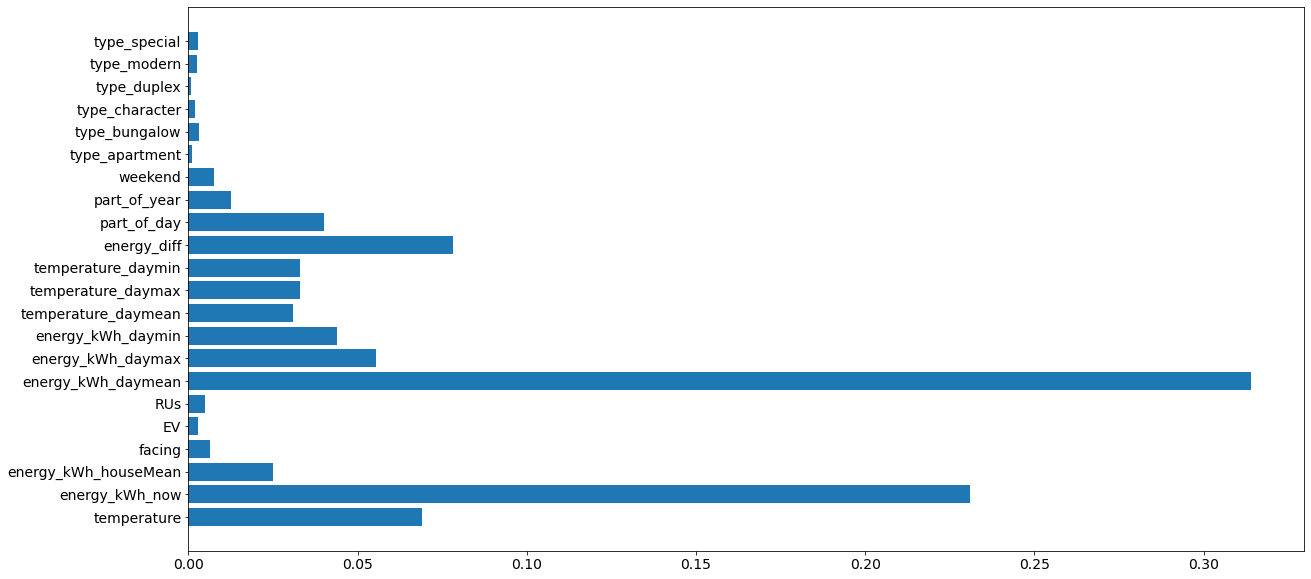

In [ ]:
forest_importances = pd.DataFrame(importances, index=feature_names,columns=['importance']).sort_values('importance',ascending=False)

plt.rcParams.update({'figure.figsize': (20, 10.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(feature_names, importances) 


- Preparing data, so I can make predictions and their graph.
- The houses I picked to graph are the best and worst performing houses, so I could try to find out what makes the difference.

In [ ]:
predictions_1=predictions_2=predictions_3=predictions_4=predictions_5=predictions_6=predictions_7=predictions_8=predictions_9=predictions_10=\
predictions_11=predictions_12=predictions_13=predictions_14=predictions_15=predictions_16=predictions_17=predictions_18=predictions_19=predictions_20=\
predictions_21=predictions_22=predictions_23=predictions_24=predictions_25=predictions_26=predictions_27=predictions_28 = np.ndarray(0)

house_predictions = [predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6,predictions_7,predictions_8,predictions_9,predictions_10,\
predictions_11,predictions_12,predictions_13,predictions_14,predictions_15,predictions_16,predictions_17,predictions_18,predictions_19,predictions_20,\
predictions_21,predictions_22,predictions_23,predictions_24,predictions_25,predictions_26,predictions_27,predictions_28] 

In [ ]:
def get_residentials(residential_dict):
  indiv_prediction_data(residential)
residential = get_residentials(residential)

In [ ]:
kfold = KFold(n_splits=4,shuffle=True)
for i in range (1,len(residential)+1,1):
  house_predictions[i-1] = cross_val_predict(RandomForestRegressor(n_estimators=10,n_jobs=-1,verbose=1,min_samples_split=60,min_samples_leaf=20),\
                                    residential[str(i)].drop(['energy_kWh','energy_kWh_2','energy_kWh_3'],axis=1),residential[str(i)]['energy_kWh'], cv=kfold,n_jobs=-1,verbose=1)

In [ ]:
i = 0
for p in house_predictions:
  house_predictions[i] = pd.DataFrame({'real':residentials[str(i+1)].energy_kWh,'pred':house_predictions[i]})
  i+=1

- Selecting a week period in the dataset, so I can see the details when I graph the lineplots, otherwise the data is too dense.

In [ ]:
# function drops index row, for graphing purposes
def drop_index(dataset):
  dataset = dataset.reset_index()
  return dataset.drop(['index'], axis=1)

# dataset for lineplot
def make_lineplot(data, start_week, end_week):
  lineplot = {}
  i = 1
  for p in data:
    lineplot['House_'+str(i)] = p[start_week*168 : end_week*168]
    lineplot['House_'+str(i)] = drop_index(lineplot['House_'+str(i)])
    i+=1
  return lineplot

# dataset for kdeplot
def make_kdeplot(data):
  kdeplot = {}
  i = 1
  for p in data:
    kdeplot['House_'+str(i)] = p
    i+=1
  return kdeplot

def draw_kdeplot(house_data):
  plt.figure(figsize=(15,15))
  sns.kdeplot(x=house_data['real'],data=house_data)
  sns.kdeplot(x=house_data['pred'],data=house_data)
  plt.legend(['real','predicted'])

def draw_lineplot(house_data):
  plt.figure(figsize=(15,15))
  sns.lineplot(x=house_data.index,y=house_data['real'],data=house_data)
  sns.lineplot(x=house_data.index,y=house_data['pred'],data=house_data)
  plt.legend(['real','predicted'])

- KDE plots of houses with the best and worst results:
  - All plots show a common trait and that is, that they have two peaks in values. I noticed that my model normally undershoots the first peak and overshoots the second peak.

In [ ]:
lineplot = make_lineplot(house_predictions, 0, 2)
kdeplot = make_kdeplot(house_predictions)

In [ ]:
draw_kdeplot(kdeplot['House_6'])

In [ ]:
draw_kdeplot(kdeplot['House_12'])

In [ ]:
draw_kdeplot(kdeplot['House_14'])

In [ ]:
draw_kdeplot(kdeplot['House_15'])

In [ ]:
draw_kdeplot(kdeplot['House_17'])

In [ ]:
draw_kdeplot(kdeplot['House_18'])

In [ ]:
draw_kdeplot(kdeplot['House_19'])

In [ ]:
draw_kdeplot(kdeplot['House_22'])

In [ ]:
draw_kdeplot(kdeplot['House_23'])

In [ ]:
draw_kdeplot(kdeplot['House_24'])

In [ ]:
draw_kdeplot(kdeplot['House_26'])

In [ ]:
draw_kdeplot(kdeplot['House_28'])

- Lineplots of a one week period, including the real values of energy consumption and the predictions for each house.
  - The graphs are made using RandomForestRegressor, which had the smallest error. From the graphs you can see, that my predictions aren't "flexible" enough in other words, I am undershooting the "peaks" of consumption and overshooting the "valleys". The undershooting part is a big problem, that cannot be fixed when using RandomForest algorithm, as I have to punish the undershooting more than overshooting, and the way to do that would be to write a custom loss function, which RF doesn't have. I found that out only after doing graphs, and later decided to test out XGBoostRegressor and recurrent neural networks, which have the possibility to adjust the loss function.
  - I also tried graphing out the results using XGBRegressor, both results shared many similarities. To improve the performance I will try a different loss function for XGBRegressor.

In [ ]:
draw_lineplot(lineplot['House_6'])

In [ ]:
draw_lineplot(lineplot['House_12'])

In [ ]:
draw_lineplot(lineplot['House_14'])

In [ ]:
draw_lineplot(lineplot['House_15'])

In [ ]:
draw_lineplot(lineplot['House_17'])

In [ ]:
draw_lineplot(lineplot['House_18'])

In [ ]:
draw_lineplot(lineplot['House_19'])

In [ ]:
draw_lineplot(lineplot['House_22'])

In [ ]:
draw_lineplot(lineplot['House_23'])

In [ ]:
draw_lineplot(lineplot['House_24'])

In [ ]:
draw_lineplot(lineplot['House_26'])

In [ ]:
draw_lineplot(lineplot['House_28'])